In [1]:
import MotifCompendium
import MotifCompendium.utils.analysis as utils_analysis
import MotifCompendium.utils.motif as utils_motif
from MotifCompendium.utils.similarity import set_default_options
from IPython.display import display, HTML, Image
import pandas as pd
import numpy as np
import os
import h5py

In [2]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ["CUDA_VISIBLE_DEVICES"] = "MIG-f80e9374-504a-571b-bac0-6fb00750db4c" # DURGA
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # KRISHNA
set_default_options(max_chunk=1000, max_cpus=32, use_gpu=True)

In [3]:
modisco_dir = '/oak/stanford/groups/akundaje/projects/neuro-variants/modisco'
modisco_dict = {}

for group in os.listdir(modisco_dir):
    print(group)
    group_dir = f"{modisco_dir}/{group}/original_peaks"

    for cluster in os.listdir(group_dir):
        modisco_dict[cluster] = f"{group_dir}/{cluster}/{cluster}.original_peaks.counts_scores.w500.modisco.h5"

trevino_2021
domcke_2020
corces_2020


In [4]:
for key in modisco_dict:
    print(key, modisco_dict[key])

trevino_2021.c20 /oak/stanford/groups/akundaje/projects/neuro-variants/modisco/trevino_2021/original_peaks/trevino_2021.c20/trevino_2021.c20.original_peaks.counts_scores.w500.modisco.h5
trevino_2021.c19 /oak/stanford/groups/akundaje/projects/neuro-variants/modisco/trevino_2021/original_peaks/trevino_2021.c19/trevino_2021.c19.original_peaks.counts_scores.w500.modisco.h5
trevino_2021.c9 /oak/stanford/groups/akundaje/projects/neuro-variants/modisco/trevino_2021/original_peaks/trevino_2021.c9/trevino_2021.c9.original_peaks.counts_scores.w500.modisco.h5
trevino_2021.c16 /oak/stanford/groups/akundaje/projects/neuro-variants/modisco/trevino_2021/original_peaks/trevino_2021.c16/trevino_2021.c16.original_peaks.counts_scores.w500.modisco.h5
trevino_2021.c4 /oak/stanford/groups/akundaje/projects/neuro-variants/modisco/trevino_2021/original_peaks/trevino_2021.c4/trevino_2021.c4.original_peaks.counts_scores.w500.modisco.h5
trevino_2021.c1 /oak/stanford/groups/akundaje/projects/neuro-variants/modisc

In [5]:
len(modisco_dict)

54

In [6]:
mc = MotifCompendium.build_from_modisco(modisco_dict, max_chunk=1000, use_gpu=True)
# mc = MotifCompendium.load('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/neuro-variants.all_data.motif_compendium.mc')

print(mc)

Motif Compendium with 2488 motifs.
                                     name  num_seqlets                  model  \
0          trevino_2021.c20-pos.pattern_0        12653       trevino_2021.c20   
1          trevino_2021.c20-pos.pattern_1        12060       trevino_2021.c20   
2         trevino_2021.c20-pos.pattern_10         3173       trevino_2021.c20   
3         trevino_2021.c20-pos.pattern_11         2728       trevino_2021.c20   
4         trevino_2021.c20-pos.pattern_12         1854       trevino_2021.c20   
...                                   ...          ...                    ...   
2483  corces_2020.Cluster24-pos.pattern_6         5931  corces_2020.Cluster24   
2484  corces_2020.Cluster24-pos.pattern_7         5715  corces_2020.Cluster24   
2485  corces_2020.Cluster24-pos.pattern_8         4900  corces_2020.Cluster24   
2486  corces_2020.Cluster24-pos.pattern_9         3949  corces_2020.Cluster24   
2487  corces_2020.Cluster24-neg.pattern_0          677  corces_2020.Cluste

In [7]:
print(mc.motifs.shape)

(2488, 30, 8)


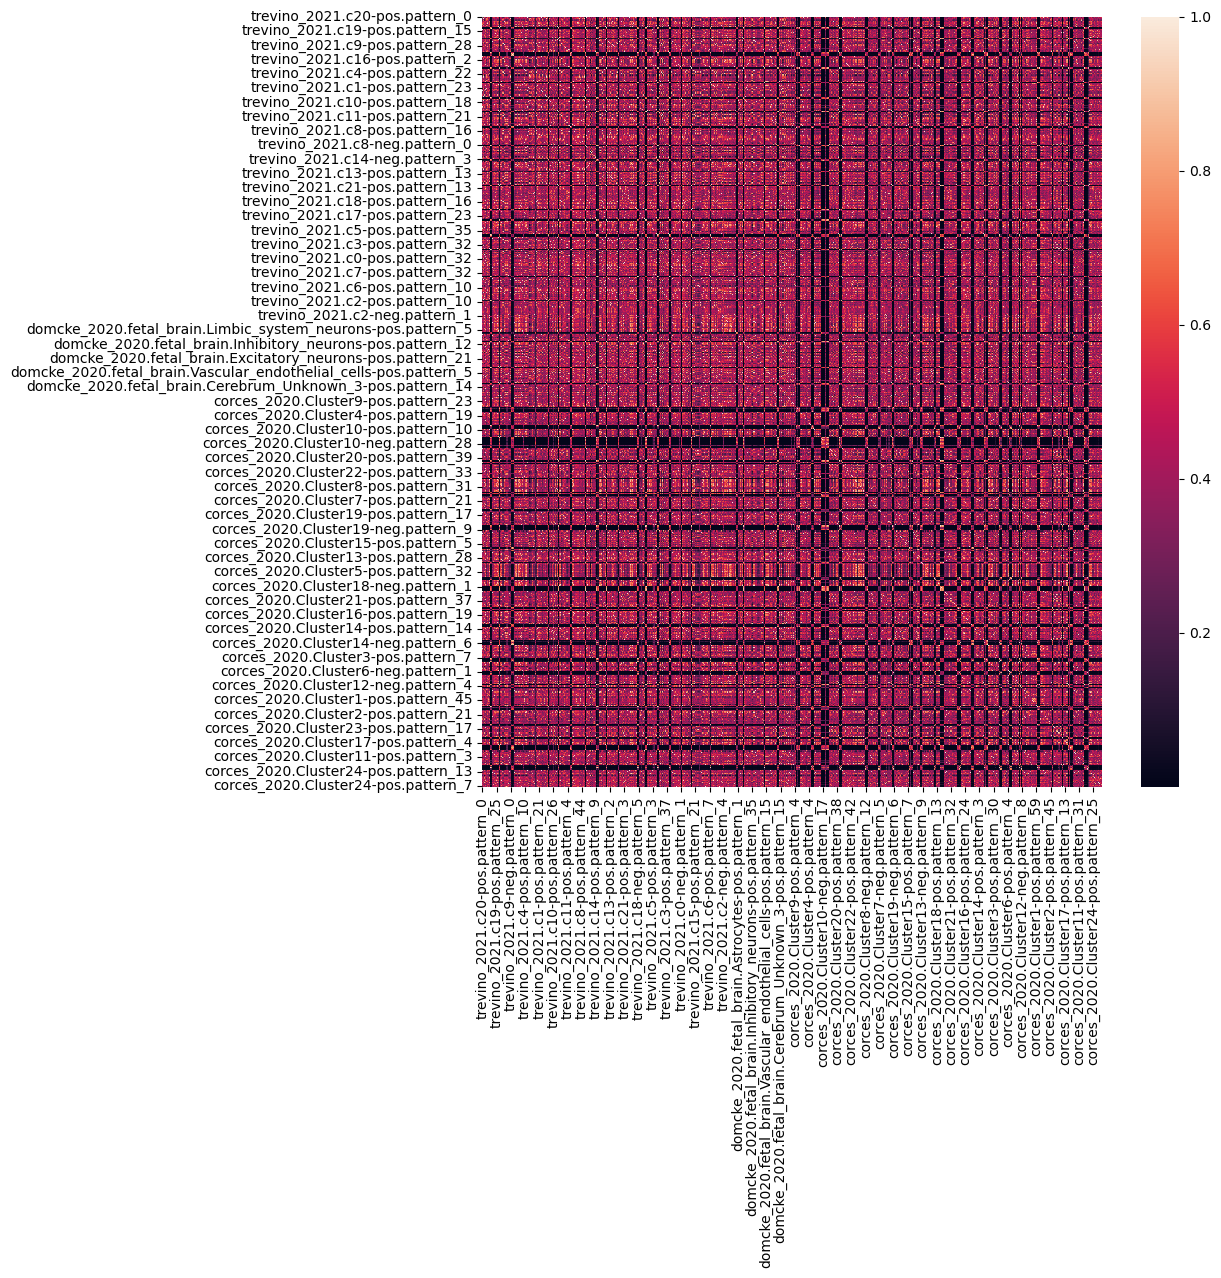

In [8]:
mc.heatmap(show=True, label=True)

In [9]:
mc.metadata

,name,num_seqlets,model,posneg
0,trevino_2021.c20-pos.pattern_0,12653,trevino_2021.c20,NaN
1,trevino_2021.c20-pos.pattern_1,12060,trevino_2021.c20,NaN
2,trevino_2021.c20-pos.pattern_10,3173,trevino_2021.c20,NaN
3,trevino_2021.c20-pos.pattern_11,2728,trevino_2021.c20,NaN
4,trevino_2021.c20-pos.pattern_12,1854,trevino_2021.c20,NaN
...,...,...,...,...
2483,corces_2020.Cluster24-pos.pattern_6,5931,corces_2020.Cluster24,NaN
2484,corces_2020.Cluster24-pos.pattern_7,5715,corces_2020.Cluster24,NaN
2485,corces_2020.Cluster24-pos.pattern_8,4900,corces_2020.Cluster24,NaN
2486,corces_2020.Cluster24-pos.pattern_9,3949,corces_2020.Cluster24,NaN


In [10]:
mc['posneg'] = mc['name'].apply(lambda x: 'pos' if '-pos.pattern' in x else 'neg')
mc['dataset'] = mc['name'].apply(lambda x: x.split('.')[0])

mc.metadata

,name,num_seqlets,model,posneg,dataset
0,trevino_2021.c20-pos.pattern_0,12653,trevino_2021.c20,pos,trevino_2021
1,trevino_2021.c20-pos.pattern_1,12060,trevino_2021.c20,pos,trevino_2021
2,trevino_2021.c20-pos.pattern_10,3173,trevino_2021.c20,pos,trevino_2021
3,trevino_2021.c20-pos.pattern_11,2728,trevino_2021.c20,pos,trevino_2021
4,trevino_2021.c20-pos.pattern_12,1854,trevino_2021.c20,pos,trevino_2021
...,...,...,...,...,...
2483,corces_2020.Cluster24-pos.pattern_6,5931,corces_2020.Cluster24,pos,corces_2020
2484,corces_2020.Cluster24-pos.pattern_7,5715,corces_2020.Cluster24,pos,corces_2020
2485,corces_2020.Cluster24-pos.pattern_8,4900,corces_2020.Cluster24,pos,corces_2020
2486,corces_2020.Cluster24-pos.pattern_9,3949,corces_2020.Cluster24,pos,corces_2020


In [11]:
mc.save('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/neuro-variants.all_data.motif_compendium.mc')

In [12]:
utils_analysis.plot_similarity_distribution(mc, '/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/neuro-variants.all_data.similarity_distribution.html')

In [13]:
mc.cluster(algorithm="leiden", similarity_threshold=0.96, save_name='leiden_96')

mc.metadata

,name,num_seqlets,model,posneg,dataset,leiden_96
0,trevino_2021.c20-pos.pattern_0,12653,trevino_2021.c20,pos,trevino_2021,10
1,trevino_2021.c20-pos.pattern_1,12060,trevino_2021.c20,pos,trevino_2021,5
2,trevino_2021.c20-pos.pattern_10,3173,trevino_2021.c20,pos,trevino_2021,2
3,trevino_2021.c20-pos.pattern_11,2728,trevino_2021.c20,pos,trevino_2021,7
4,trevino_2021.c20-pos.pattern_12,1854,trevino_2021.c20,pos,trevino_2021,3
...,...,...,...,...,...,...
2483,corces_2020.Cluster24-pos.pattern_6,5931,corces_2020.Cluster24,pos,corces_2020,99
2484,corces_2020.Cluster24-pos.pattern_7,5715,corces_2020.Cluster24,pos,corces_2020,4
2485,corces_2020.Cluster24-pos.pattern_8,4900,corces_2020.Cluster24,pos,corces_2020,19
2486,corces_2020.Cluster24-pos.pattern_9,3949,corces_2020.Cluster24,pos,corces_2020,10


In [14]:
os.makedirs('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96',
            exist_ok=True)

In [15]:
mc.motif_collection_html('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.motif_collection.leiden_96.html',
                         group_by='leiden_96', average_motif=True, max_cpus=40)

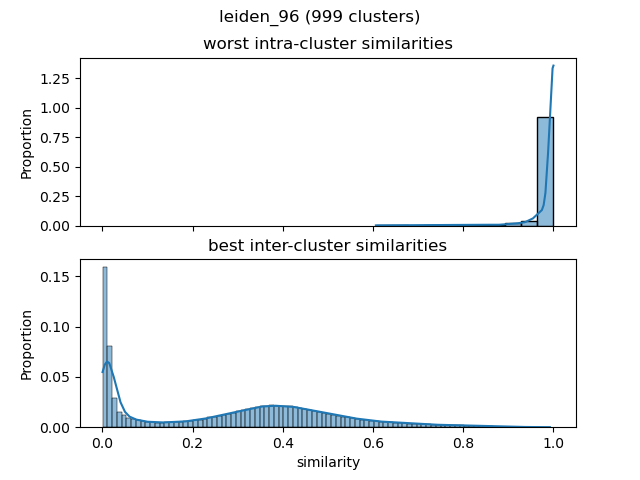

In [16]:
utils_analysis.judge_clustering(mc, 'leiden_96', '/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.clustering_quality.leiden_96.png')

display(Image('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.clustering_quality.leiden_96.png'))

In [17]:
mc_avg = mc.cluster_averages(
    'leiden_96',
    aggregations=[
        ('name', 'unique', 'num_patterns'),
        ('num_seqlets', 'sum', 'num_seqlets'),
        ("model", "unique", "num_samples"),
        ("dataset", "unique", "num_datasets"),
        ("dataset", "concat", "datasets"),
        ("posneg", "concat", "posneg")
    ],
    max_chunk=1000, use_gpu=True
)

mc_avg.metadata

,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg
0,leiden_96#0,74,194827,53,3,"corces_2020,domcke_2020,trevino_2021",pos
1,leiden_96#1,58,372948,54,3,"corces_2020,domcke_2020,trevino_2021",pos
2,leiden_96#2,55,137965,53,3,"corces_2020,domcke_2020,trevino_2021",pos
3,leiden_96#3,54,92698,54,3,"corces_2020,domcke_2020,trevino_2021",pos
4,leiden_96#4,54,317250,54,3,"corces_2020,domcke_2020,trevino_2021",pos
...,...,...,...,...,...,...,...
994,leiden_96#994,1,28,1,1,corces_2020,pos
995,leiden_96#995,1,27,1,1,corces_2020,pos
996,leiden_96#996,1,26,1,1,corces_2020,pos
997,leiden_96#997,1,24,1,1,corces_2020,pos


In [18]:
utils_analysis.label_from_pfms(mc_avg, "/oak/stanford/groups/akundaje/soumyak/motifs/latest/hocomoco_v12/H12CORE_meme_format.meme", "hocomoco_similarity", "hocomoco_match",
                               max_chunk=1000, use_gpu=True)

mc_avg.metadata

,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match
0,leiden_96#0,74,194827,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.914414,NRF1.H12CORE.0.PS.A
1,leiden_96#1,58,372948,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.969925,SP4.H12CORE.0.P.C
2,leiden_96#2,55,137965,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.937175,GMEB2.H12CORE.2.SM.B
3,leiden_96#3,54,92698,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.981210,ZN143.H12CORE.0.P.B
4,leiden_96#4,54,317250,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.978794,NFYA.H12CORE.0.P.B
...,...,...,...,...,...,...,...,...,...
994,leiden_96#994,1,28,1,1,corces_2020,pos,0.912841,RFX1.H12CORE.1.PSM.A
995,leiden_96#995,1,27,1,1,corces_2020,pos,0.908444,CEBPD.H12CORE.0.P.B
996,leiden_96#996,1,26,1,1,corces_2020,pos,0.898491,MITF.H12CORE.0.P.B
997,leiden_96#997,1,24,1,1,corces_2020,pos,0.901590,RUNX2.H12CORE.0.P.B


In [19]:
utils_analysis.label_from_pfms(mc_avg, "/oak/stanford/groups/akundaje/soumyak/motifs/latest/vierstra/all.dbs.meme", "vierstra_similarity", "vierstra_match",
                               max_chunk=1000, use_gpu=True)

mc_avg.metadata

,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match
0,leiden_96#0,74,194827,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.914414,NRF1.H12CORE.0.PS.A,0.951238,M09443_2.00
1,leiden_96#1,58,372948,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.969925,SP4.H12CORE.0.P.C,0.944662,M08296_2.00
2,leiden_96#2,55,137965,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.937175,GMEB2.H12CORE.2.SM.B,0.973756,M04258_2.00
3,leiden_96#3,54,92698,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.981210,ZN143.H12CORE.0.P.B,0.971501,M07950_2.00
4,leiden_96#4,54,317250,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.978794,NFYA.H12CORE.0.P.B,0.984840,MA0060.1
...,...,...,...,...,...,...,...,...,...,...,...
994,leiden_96#994,1,28,1,1,corces_2020,pos,0.912841,RFX1.H12CORE.1.PSM.A,0.922637,M09362_2.00
995,leiden_96#995,1,27,1,1,corces_2020,pos,0.908444,CEBPD.H12CORE.0.P.B,0.907553,M08813_2.00
996,leiden_96#996,1,26,1,1,corces_2020,pos,0.898491,MITF.H12CORE.0.P.B,0.854161,M08308_2.00
997,leiden_96#997,1,24,1,1,corces_2020,pos,0.901590,RUNX2.H12CORE.0.P.B,0.919790,M02751_2.00


In [20]:
vierstra_metadata = pd.read_table('/oak/stanford/groups/akundaje/soumyak/motifs/latest/vierstra/metadata.tsv')

vierstra_metadata

,motif_id,cluster,source_id,tf_name,family_name,motif_type,PMID
0,BANP_Grand2021,AC0375,BANP,BANP,Unknown,ChIP-seq,34234345
1,M00217_2.00,AC0237,ZNF200_H322Y,ZNF200,C2H2 ZF,PBM,27013732
2,M00218_2.00,AC0623,ZNF200_REF,ZNF200,C2H2 ZF,PBM,27013732
3,M00219_2.00,AC0623,ZNF200_S265Y,ZNF200,C2H2 ZF,PBM,27013732
4,M00220_2.00,AC0606,SNAI2_D119E,SNAI2,C2H2 ZF,PBM,27013732
...,...,...,...,...,...,...,...
5188,MA1984.1,AC0490,MA1984.1,ZNF667,['C2H2 zinc finger factors'],Unknown,27852650
5189,MA1985.1,AC0406,MA1985.1,ZNF669,['C2H2 zinc finger factors'],Unknown,27852650
5190,MA1986.1,AC0124,MA1986.1,ZNF692,['C2H2 zinc finger factors'],Unknown,25690854
5191,MA1987.1,AC0178,MA1987.1,ZNF701,['C2H2 zinc finger factors'],Unknown,22955616


In [21]:
mc_avg.metadata = mc_avg.metadata.merge(vierstra_metadata[['motif_id', 'tf_name']],
                                        left_on='vierstra_match', right_on='motif_id',
                                        how='left')
mc_avg.metadata['vierstra_match'] = mc_avg.metadata['tf_name'] + '_' + mc_avg.metadata['vierstra_match']
mc_avg.metadata.drop(columns=['motif_id', 'tf_name'], inplace=True)

mc_avg.metadata

,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match
0,leiden_96#0,74,194827,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.914414,NRF1.H12CORE.0.PS.A,0.951238,NRF1_M09443_2.00
1,leiden_96#1,58,372948,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.969925,SP4.H12CORE.0.P.C,0.944662,SP4_M08296_2.00
2,leiden_96#2,55,137965,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.937175,GMEB2.H12CORE.2.SM.B,0.973756,CREB1_M04258_2.00
3,leiden_96#3,54,92698,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.981210,ZN143.H12CORE.0.P.B,0.971501,ETS1_M07950_2.00
4,leiden_96#4,54,317250,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.978794,NFYA.H12CORE.0.P.B,0.984840,NFYA_MA0060.1
...,...,...,...,...,...,...,...,...,...,...,...
994,leiden_96#994,1,28,1,1,corces_2020,pos,0.912841,RFX1.H12CORE.1.PSM.A,0.922637,RFX2_M09362_2.00
995,leiden_96#995,1,27,1,1,corces_2020,pos,0.908444,CEBPD.H12CORE.0.P.B,0.907553,CEBPA_M08813_2.00
996,leiden_96#996,1,26,1,1,corces_2020,pos,0.898491,MITF.H12CORE.0.P.B,0.854161,ZNF317_M08308_2.00
997,leiden_96#997,1,24,1,1,corces_2020,pos,0.901590,RUNX2.H12CORE.0.P.B,0.919790,RUNX3_M02751_2.00


In [22]:
selin_mc = MotifCompendium.load("/oak/stanford/groups/akundaje/soumyak/motifs/latest/selin/selin_compendium.mc", safe=False)

selin_mc.metadata

,name,num_seqlets,model,posneg,organ,merged_pattern,annotation
0,Muscle_c5-pos.pattern_0,19177,Muscle_c5,pos,Muscle,pos.Average_305__merged_pattern_0,CTCF#1
1,Muscle_c5-pos.pattern_1,12674,Muscle_c5,pos,Muscle,pos.Average_294__merged_pattern_0,BHLH:TFAP/MYOD#1
2,Muscle_c5-pos.pattern_10,1907,Muscle_c5,pos,Muscle,pos.Average_282__merged_pattern_0,RFX#1
3,Muscle_c5-pos.pattern_11,1693,Muscle_c5,pos,Muscle,pos.Average_85__merged_pattern_0,BZIP:ATF/CREB#1
4,Muscle_c5-pos.pattern_12,1626,Muscle_c5,pos,Muscle,pos.Average_161__merged_pattern_0,ZNF143#1
...,...,...,...,...,...,...,...
6162,Stomach_c11-pos.pattern_5,3273,Stomach_c11,pos,Stomach,pos.Average_280__merged_pattern_0,BZIP:ATF/CREB#1
6163,Stomach_c11-pos.pattern_6,2650,Stomach_c11,pos,Stomach,pos.Average_159__merged_pattern_0,NRF1
6164,Stomach_c11-pos.pattern_7,2506,Stomach_c11,pos,Stomach,pos.Average_303__merged_pattern_4,HD:MEIS/TGIF
6165,Stomach_c11-pos.pattern_8,1686,Stomach_c11,pos,Stomach,pos.Average_255__merged_pattern_0,SRF#1


In [23]:
mc_avg.assign_clusters_from_other(selin_mc, "annotation", "selin_similarity", "selin_match",
                                  max_chunk=1000, use_gpu=True)

mc_avg.metadata

,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match,selin_similarity,selin_match
0,leiden_96#0,74,194827,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.914414,NRF1.H12CORE.0.PS.A,0.951238,NRF1_M09443_2.00,0.998523,NRF1
1,leiden_96#1,58,372948,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.969925,SP4.H12CORE.0.P.C,0.944662,SP4_M08296_2.00,0.998351,SP/KLF
2,leiden_96#2,55,137965,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.937175,GMEB2.H12CORE.2.SM.B,0.973756,CREB1_M04258_2.00,0.998884,BZIP:ATF/CREB#1
3,leiden_96#3,54,92698,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.981210,ZN143.H12CORE.0.P.B,0.971501,ETS1_M07950_2.00,0.999409,ZNF143#1
4,leiden_96#4,54,317250,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.978794,NFYA.H12CORE.0.P.B,0.984840,NFYA_MA0060.1,0.999510,NFY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,leiden_96#994,1,28,1,1,corces_2020,pos,0.912841,RFX1.H12CORE.1.PSM.A,0.922637,RFX2_M09362_2.00,0.962012,RFX#1
995,leiden_96#995,1,27,1,1,corces_2020,pos,0.908444,CEBPD.H12CORE.0.P.B,0.907553,CEBPA_M08813_2.00,0.930452,BZIP:CEBP#1
996,leiden_96#996,1,26,1,1,corces_2020,pos,0.898491,MITF.H12CORE.0.P.B,0.854161,ZNF317_M08308_2.00,0.888819,BHLH:USF1/2#1
997,leiden_96#997,1,24,1,1,corces_2020,pos,0.901590,RUNX2.H12CORE.0.P.B,0.919790,RUNX3_M02751_2.00,0.937730,RUNX#1


In [24]:
cluster_labels_dict = dict()
annotations = []

for index, row in mc_avg.metadata.iterrows():
    if row["selin_similarity"] > 0.96:
        cluster_labels_dict[index] = f"{row['selin_match']}_{index}".replace("/", "-").replace("#", "-")
        annotations.append(f"{row['selin_match']}_{index}".replace("/", "-").replace("#", "-"))
    elif row["vierstra_similarity"] > 0.96:
        cluster_labels_dict[index] = f"{row['vierstra_match']}_{index}"
        annotations.append(f"{row['vierstra_match']}_{index}")
    elif row["hocomoco_similarity"] > 0.96:
        cluster_labels_dict[index] = f"{row['hocomoco_match']}_{index}"
        annotations.append(f"{row['hocomoco_match']}_{index}")
    else:
        cluster_labels_dict[index] = f"Unknown_{index}"
        annotations.append(f"Unknown_{index}")

mc_avg["annotation"] = annotations
mc["annotation"] = mc["leiden_96"].map(cluster_labels_dict)

In [25]:
mc.metadata

,name,num_seqlets,model,posneg,dataset,leiden_96,annotation
0,trevino_2021.c20-pos.pattern_0,12653,trevino_2021.c20,pos,trevino_2021,10,NFI-1_10
1,trevino_2021.c20-pos.pattern_1,12060,trevino_2021.c20,pos,trevino_2021,5,CTCF-1_5
2,trevino_2021.c20-pos.pattern_10,3173,trevino_2021.c20,pos,trevino_2021,2,BZIP:ATF-CREB-1_2
3,trevino_2021.c20-pos.pattern_11,2728,trevino_2021.c20,pos,trevino_2021,7,ETS:ELF-ETV-1_7
4,trevino_2021.c20-pos.pattern_12,1854,trevino_2021.c20,pos,trevino_2021,3,ZNF143-1_3
...,...,...,...,...,...,...,...
2483,corces_2020.Cluster24-pos.pattern_6,5931,corces_2020.Cluster24,pos,corces_2020,99,IRF-STAT_IRF-STAT-1_99
2484,corces_2020.Cluster24-pos.pattern_7,5715,corces_2020.Cluster24,pos,corces_2020,4,NFY_4
2485,corces_2020.Cluster24-pos.pattern_8,4900,corces_2020.Cluster24,pos,corces_2020,19,BZIP:ATF-CREB-1_19
2486,corces_2020.Cluster24-pos.pattern_9,3949,corces_2020.Cluster24,pos,corces_2020,10,NFI-1_10


In [26]:
mc_avg.metadata

,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match,selin_similarity,selin_match,annotation
0,leiden_96#0,74,194827,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.914414,NRF1.H12CORE.0.PS.A,0.951238,NRF1_M09443_2.00,0.998523,NRF1,NRF1_0
1,leiden_96#1,58,372948,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.969925,SP4.H12CORE.0.P.C,0.944662,SP4_M08296_2.00,0.998351,SP/KLF,SP-KLF_1
2,leiden_96#2,55,137965,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.937175,GMEB2.H12CORE.2.SM.B,0.973756,CREB1_M04258_2.00,0.998884,BZIP:ATF/CREB#1,BZIP:ATF-CREB-1_2
3,leiden_96#3,54,92698,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.981210,ZN143.H12CORE.0.P.B,0.971501,ETS1_M07950_2.00,0.999409,ZNF143#1,ZNF143-1_3
4,leiden_96#4,54,317250,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.978794,NFYA.H12CORE.0.P.B,0.984840,NFYA_MA0060.1,0.999510,NFY,NFY_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,leiden_96#994,1,28,1,1,corces_2020,pos,0.912841,RFX1.H12CORE.1.PSM.A,0.922637,RFX2_M09362_2.00,0.962012,RFX#1,RFX-1_994
995,leiden_96#995,1,27,1,1,corces_2020,pos,0.908444,CEBPD.H12CORE.0.P.B,0.907553,CEBPA_M08813_2.00,0.930452,BZIP:CEBP#1,Unknown_995
996,leiden_96#996,1,26,1,1,corces_2020,pos,0.898491,MITF.H12CORE.0.P.B,0.854161,ZNF317_M08308_2.00,0.888819,BHLH:USF1/2#1,Unknown_996
997,leiden_96#997,1,24,1,1,corces_2020,pos,0.901590,RUNX2.H12CORE.0.P.B,0.919790,RUNX3_M02751_2.00,0.937730,RUNX#1,Unknown_997


In [27]:
print("Able to label")
print(mc_avg[~mc_avg["annotation"].str.startswith("Unknown")])

print()

print("Not able to label")
print(mc_avg[mc_avg["annotation"].str.startswith("Unknown")])

Able to label
Motif Compendium with 183 motifs.
              name  num_patterns  num_seqlets  num_samples  num_datasets  \
0      leiden_96#0            74       194827           53             3   
1      leiden_96#1            58       372948           54             3   
2      leiden_96#2            55       137965           53             3   
3      leiden_96#3            54        92698           54             3   
4      leiden_96#4            54       317250           54             3   
..             ...           ...          ...          ...           ...   
178  leiden_96#976             1          194            1             1   
179  leiden_96#977             1          168            1             1   
180  leiden_96#979             1           81            1             1   
181  leiden_96#990             1           37            1             1   
182  leiden_96#994             1           28            1             1   

                                 datase

In [28]:
size_4 = mc_avg.motifs.shape[2] == 4
motifs = mc_avg.motifs if size_4 else utils_motif.motif_8_to_4(mc_avg.motifs)
pos_neg = np.sum(motifs, axis=(1, 2)) > 0
pos_neg = ["pos" if x > 0 else "neg" for x in pos_neg]
mc_avg.metadata['posneg'] = pos_neg
mc_avg.metadata.reset_index(inplace=True)

mc_avg.metadata

,index,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match,selin_similarity,selin_match,annotation
0,0,leiden_96#0,74,194827,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.914414,NRF1.H12CORE.0.PS.A,0.951238,NRF1_M09443_2.00,0.998523,NRF1,NRF1_0
1,1,leiden_96#1,58,372948,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.969925,SP4.H12CORE.0.P.C,0.944662,SP4_M08296_2.00,0.998351,SP/KLF,SP-KLF_1
2,2,leiden_96#2,55,137965,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.937175,GMEB2.H12CORE.2.SM.B,0.973756,CREB1_M04258_2.00,0.998884,BZIP:ATF/CREB#1,BZIP:ATF-CREB-1_2
3,3,leiden_96#3,54,92698,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.981210,ZN143.H12CORE.0.P.B,0.971501,ETS1_M07950_2.00,0.999409,ZNF143#1,ZNF143-1_3
4,4,leiden_96#4,54,317250,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.978794,NFYA.H12CORE.0.P.B,0.984840,NFYA_MA0060.1,0.999510,NFY,NFY_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,leiden_96#994,1,28,1,1,corces_2020,pos,0.912841,RFX1.H12CORE.1.PSM.A,0.922637,RFX2_M09362_2.00,0.962012,RFX#1,RFX-1_994
995,995,leiden_96#995,1,27,1,1,corces_2020,pos,0.908444,CEBPD.H12CORE.0.P.B,0.907553,CEBPA_M08813_2.00,0.930452,BZIP:CEBP#1,Unknown_995
996,996,leiden_96#996,1,26,1,1,corces_2020,pos,0.898491,MITF.H12CORE.0.P.B,0.854161,ZNF317_M08308_2.00,0.888819,BHLH:USF1/2#1,Unknown_996
997,997,leiden_96#997,1,24,1,1,corces_2020,pos,0.901590,RUNX2.H12CORE.0.P.B,0.919790,RUNX3_M02751_2.00,0.937730,RUNX#1,Unknown_997


In [29]:
pos_neg[700]

'neg'

In [30]:
mc_avg.metadata.loc[mc_avg.metadata.index == 700]

,index,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match,selin_similarity,selin_match,annotation
700,700,leiden_96#700,1,147,1,1,corces_2020,neg,0.740359,TBX4.H12CORE.0.PS.A,0.804061,ZNF513_M08322_2.00,0.767865,"unresolved,repressive,YY1/2-like",Unknown_700


In [31]:
mc_avg.metadata['posneg'].value_counts()

posneg
pos    725
neg    274
Name: count, dtype: int64

In [32]:
pos_sofar = 0
neg_sofar = 0
names = []

for index, row in mc_avg.metadata.iterrows():
    if row['posneg'] == 'pos':
        names.append(f"pos_patterns.pattern_{pos_sofar}")
        pos_sofar += 1
    else:
        names.append(f"neg_patterns.pattern_{neg_sofar}")
        neg_sofar += 1

mc_avg.metadata['name'] = names

mc_avg.metadata

,index,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match,selin_similarity,selin_match,annotation
0,0,pos_patterns.pattern_0,74,194827,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.914414,NRF1.H12CORE.0.PS.A,0.951238,NRF1_M09443_2.00,0.998523,NRF1,NRF1_0
1,1,pos_patterns.pattern_1,58,372948,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.969925,SP4.H12CORE.0.P.C,0.944662,SP4_M08296_2.00,0.998351,SP/KLF,SP-KLF_1
2,2,pos_patterns.pattern_2,55,137965,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.937175,GMEB2.H12CORE.2.SM.B,0.973756,CREB1_M04258_2.00,0.998884,BZIP:ATF/CREB#1,BZIP:ATF-CREB-1_2
3,3,pos_patterns.pattern_3,54,92698,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.981210,ZN143.H12CORE.0.P.B,0.971501,ETS1_M07950_2.00,0.999409,ZNF143#1,ZNF143-1_3
4,4,pos_patterns.pattern_4,54,317250,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.978794,NFYA.H12CORE.0.P.B,0.984840,NFYA_MA0060.1,0.999510,NFY,NFY_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,pos_patterns.pattern_720,1,28,1,1,corces_2020,pos,0.912841,RFX1.H12CORE.1.PSM.A,0.922637,RFX2_M09362_2.00,0.962012,RFX#1,RFX-1_994
995,995,pos_patterns.pattern_721,1,27,1,1,corces_2020,pos,0.908444,CEBPD.H12CORE.0.P.B,0.907553,CEBPA_M08813_2.00,0.930452,BZIP:CEBP#1,Unknown_995
996,996,pos_patterns.pattern_722,1,26,1,1,corces_2020,pos,0.898491,MITF.H12CORE.0.P.B,0.854161,ZNF317_M08308_2.00,0.888819,BHLH:USF1/2#1,Unknown_996
997,997,pos_patterns.pattern_723,1,24,1,1,corces_2020,pos,0.901590,RUNX2.H12CORE.0.P.B,0.919790,RUNX3_M02751_2.00,0.937730,RUNX#1,Unknown_997


In [33]:
mc_avg.metadata.loc[mc_avg.metadata.index == 700]

,index,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match,selin_similarity,selin_match,annotation
700,700,neg_patterns.pattern_173,1,147,1,1,corces_2020,neg,0.740359,TBX4.H12CORE.0.PS.A,0.804061,ZNF513_M08322_2.00,0.767865,"unresolved,repressive,YY1/2-like",Unknown_700


In [34]:
mc_avg.metadata.loc[mc_avg.metadata['posneg'] == 'pos']

,index,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match,selin_similarity,selin_match,annotation
0,0,pos_patterns.pattern_0,74,194827,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.914414,NRF1.H12CORE.0.PS.A,0.951238,NRF1_M09443_2.00,0.998523,NRF1,NRF1_0
1,1,pos_patterns.pattern_1,58,372948,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.969925,SP4.H12CORE.0.P.C,0.944662,SP4_M08296_2.00,0.998351,SP/KLF,SP-KLF_1
2,2,pos_patterns.pattern_2,55,137965,53,3,"corces_2020,domcke_2020,trevino_2021",pos,0.937175,GMEB2.H12CORE.2.SM.B,0.973756,CREB1_M04258_2.00,0.998884,BZIP:ATF/CREB#1,BZIP:ATF-CREB-1_2
3,3,pos_patterns.pattern_3,54,92698,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.981210,ZN143.H12CORE.0.P.B,0.971501,ETS1_M07950_2.00,0.999409,ZNF143#1,ZNF143-1_3
4,4,pos_patterns.pattern_4,54,317250,54,3,"corces_2020,domcke_2020,trevino_2021",pos,0.978794,NFYA.H12CORE.0.P.B,0.984840,NFYA_MA0060.1,0.999510,NFY,NFY_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,pos_patterns.pattern_720,1,28,1,1,corces_2020,pos,0.912841,RFX1.H12CORE.1.PSM.A,0.922637,RFX2_M09362_2.00,0.962012,RFX#1,RFX-1_994
995,995,pos_patterns.pattern_721,1,27,1,1,corces_2020,pos,0.908444,CEBPD.H12CORE.0.P.B,0.907553,CEBPA_M08813_2.00,0.930452,BZIP:CEBP#1,Unknown_995
996,996,pos_patterns.pattern_722,1,26,1,1,corces_2020,pos,0.898491,MITF.H12CORE.0.P.B,0.854161,ZNF317_M08308_2.00,0.888819,BHLH:USF1/2#1,Unknown_996
997,997,pos_patterns.pattern_723,1,24,1,1,corces_2020,pos,0.901590,RUNX2.H12CORE.0.P.B,0.919790,RUNX3_M02751_2.00,0.937730,RUNX#1,Unknown_997


In [35]:
mc_avg.metadata.loc[mc_avg.metadata['posneg'] == 'neg']

,index,name,num_patterns,num_seqlets,num_samples,num_datasets,datasets,posneg,hocomoco_similarity,hocomoco_match,vierstra_similarity,vierstra_match,selin_similarity,selin_match,annotation
11,11,neg_patterns.pattern_0,45,64734,42,3,"corces_2020,domcke_2020,trevino_2021",neg,0.959029,ZEB2.H12CORE.0.P.B,0.973456,ZEB1_M10093_2.00,0.998706,ZEB/SNAI,ZEB-SNAI_11
18,18,neg_patterns.pattern_1,32,8991,26,3,"corces_2020,domcke_2020,trevino_2021",neg,0.966303,COT1.H12CORE.0.PSM.A,0.977832,BCL11B_M00987_2.00,0.930791,BCL11A/Brepressive,BCL11B_M00987_2.00_18
32,32,neg_patterns.pattern_2,13,2060,13,2,"corces_2020,trevino_2021",neg,0.964859,NFYC.H12CORE.0.P.B,0.970251,NFYA_MA0060.1,0.994204,NFYrepressive,NFYrepressive_32
38,38,neg_patterns.pattern_3,8,514,8,3,"corces_2020,domcke_2020,trevino_2021",neg,0.834548,ZEB2.H12CORE.0.P.B,0.836247,ZEB1_M10093_2.00,0.994593,ZEB/SNAI_ZEB/SNAI#2,ZEB-SNAI_ZEB-SNAI-2_38
49,49,neg_patterns.pattern_4,5,173,5,2,"corces_2020,trevino_2021",neg,0.862865,ZEB2.H12CORE.0.P.B,0.861484,SNAI2_M02873_2.00,0.982536,ZEB/SNAI_ZEB/SNAI#2,ZEB-SNAI_ZEB-SNAI-2_49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,963,neg_patterns.pattern_269,1,145,1,1,corces_2020,neg,0.825741,FOXR2.H12CORE.0.M.C,0.819468,ZSCAN16_M08377_2.00,0.496863,NFYrepressive,Unknown_963
964,964,neg_patterns.pattern_270,1,138,1,1,corces_2020,neg,0.747736,LMX1B.H12CORE.2.S.B,0.766778,POU3F3_M03321_2.00,0.470313,ZEB/SNAI_ZEB/SNAI#5,Unknown_964
965,965,neg_patterns.pattern_271,1,75,1,1,corces_2020,neg,0.770838,ESR2.H12CORE.0.P.B,0.772950,ESRRA_M07988_2.00,0.673263,BCL11A/Brepressive,Unknown_965
966,966,neg_patterns.pattern_272,1,71,1,1,corces_2020,neg,0.720114,TBP.H12CORE.0.P.B,0.780314,FOXC1_M00255_2.00,0.501673,YY1/2repressive,Unknown_966


In [36]:
mc_avg.summary_table_html(
    '/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.summary_table.leiden_96.html',
    columns=['name',
             'annotation',
             'selin_similarity', 'selin_match',
             'vierstra_similarity', 'vierstra_match',
             'hocomoco_similarity', 'hocomoco_match',
             'num_patterns', 'num_seqlets', 'num_samples', 'num_datasets', 'posneg', 'index'],
    max_cpus=32
)

In [37]:
mc_avg.save('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.motif_compendium.avg.leiden_96.mc')

In [38]:
mc.save('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.motif_compendium.leiden_96.mc')

In [39]:
utils_analysis.export_modisco(mc_avg, 'name',
                              '/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.motif_compendium.avg.leiden_96.h5')

In [40]:
mc_avg.metadata.to_csv('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.motif_compendium.avg.metadata.leiden_96.tsv',
                       sep='\t', index=False)

In [41]:
# subset to where annotation does not start with Unknonwn
mc_avg_annotated_only_metadata = mc_avg.metadata.loc[~mc_avg.metadata['annotation'].str.startswith('Unknown')][['name', 'annotation']]

mc_avg_annotated_only_metadata

,name,annotation
0,pos_patterns.pattern_0,NRF1_0
1,pos_patterns.pattern_1,SP-KLF_1
2,pos_patterns.pattern_2,BZIP:ATF-CREB-1_2
3,pos_patterns.pattern_3,ZNF143-1_3
4,pos_patterns.pattern_4,NFY_4
...,...,...
976,pos_patterns.pattern_702,ETS:SPI1-BCL11A_976
977,pos_patterns.pattern_703,BZIP:CEBP_ETS_977
979,pos_patterns.pattern_705,ETS:ELF-SPIB_RUNX-1_979
990,pos_patterns.pattern_716,ETS_SP-KLF-3_990


In [42]:
mc_avg_annotated_only_metadata.to_csv('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.motif_compendium.avg.metadata.annotated_only.leiden_96.tsv',
                                      sep='\t', header=False, index=False)

In [43]:
selin_avg = selin_mc.cluster_averages(
    'annotation',
    aggregations=[
        ('name', 'unique', 'num_patterns'),
        ('num_seqlets', 'sum', 'num_seqlets'),
        ("model", "unique", "num_samples"),
        ("organ", "unique", "num_organs"),
        ("posneg", "concat", "posneg")
    ],
    max_chunk=1000, use_gpu=True
)

selin_avg.metadata

,name,num_patterns,num_seqlets,num_samples,num_organs,posneg
0,annotation#AP-2,7,12795,6,2,pos
1,annotation#AP-2_BHLH,1,25,1,1,pos
2,annotation#ATF4/CEBPG,8,4899,8,3,pos
3,annotation#BANP/ZBTB33,187,73679,187,12,pos
4,annotation#BCL11A/Brepressive,3,192,3,1,neg
...,...,...,...,...,...,...
504,"annotation#unresolved,palindromic#2",1,30,1,1,pos
505,"annotation#unresolved,repressive#1",1,23,1,1,neg
506,"annotation#unresolved,repressive#2",2,47,2,2,neg
507,"annotation#unresolved,repressive,YY1/2-like",1,35,1,1,neg


In [44]:
selin_avg.metadata['name'] = selin_avg.metadata['name'].str.split('annotation#').str[1]
selin_avg.metadata['name'] = selin_avg.metadata['name'].str.replace('/', '-').replace("#", "-")

selin_avg.metadata

,name,num_patterns,num_seqlets,num_samples,num_organs,posneg
0,AP-2,7,12795,6,2,pos
1,AP-2_BHLH,1,25,1,1,pos
2,ATF4-CEBPG,8,4899,8,3,pos
3,BANP-ZBTB33,187,73679,187,12,pos
4,BCL11A-Brepressive,3,192,3,1,neg
...,...,...,...,...,...,...
504,"unresolved,palindromic#2",1,30,1,1,pos
505,"unresolved,repressive#1",1,23,1,1,neg
506,"unresolved,repressive#2",2,47,2,2,neg
507,"unresolved,repressive,YY1-2-like",1,35,1,1,neg


In [45]:
utils_analysis.export_modisco(selin_avg, 'name',
                              '/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/selin.motif_compendium.avg.h5')

In [46]:
utils_analysis.export_modisco(selin_avg, 'name',
                              '/oak/stanford/groups/akundaje/soumyak/motifs/latest/selin/selin.motif_compendium.avg.h5')

In [47]:
modisco_results = h5py.File('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/leiden_96/neuro-variants.all_data.motif_compendium.avg.leiden_96.h5', 'r')

modisco_results.keys()

<KeysViewHDF5 ['neg_patterns', 'pos_patterns']>

In [48]:
modisco_results['pos_patterns'].keys()

<KeysViewHDF5 ['pos_patterns.pattern_0', 'pos_patterns.pattern_1', 'pos_patterns.pattern_10', 'pos_patterns.pattern_100', 'pos_patterns.pattern_101', 'pos_patterns.pattern_102', 'pos_patterns.pattern_103', 'pos_patterns.pattern_104', 'pos_patterns.pattern_105', 'pos_patterns.pattern_106', 'pos_patterns.pattern_107', 'pos_patterns.pattern_108', 'pos_patterns.pattern_109', 'pos_patterns.pattern_11', 'pos_patterns.pattern_110', 'pos_patterns.pattern_111', 'pos_patterns.pattern_112', 'pos_patterns.pattern_113', 'pos_patterns.pattern_114', 'pos_patterns.pattern_115', 'pos_patterns.pattern_116', 'pos_patterns.pattern_117', 'pos_patterns.pattern_118', 'pos_patterns.pattern_119', 'pos_patterns.pattern_12', 'pos_patterns.pattern_120', 'pos_patterns.pattern_121', 'pos_patterns.pattern_122', 'pos_patterns.pattern_123', 'pos_patterns.pattern_124', 'pos_patterns.pattern_125', 'pos_patterns.pattern_126', 'pos_patterns.pattern_127', 'pos_patterns.pattern_128', 'pos_patterns.pattern_129', 'pos_pattern

In [49]:
modisco_results['neg_patterns'].keys()

<KeysViewHDF5 ['neg_patterns.pattern_0', 'neg_patterns.pattern_1', 'neg_patterns.pattern_10', 'neg_patterns.pattern_100', 'neg_patterns.pattern_101', 'neg_patterns.pattern_102', 'neg_patterns.pattern_103', 'neg_patterns.pattern_104', 'neg_patterns.pattern_105', 'neg_patterns.pattern_106', 'neg_patterns.pattern_107', 'neg_patterns.pattern_108', 'neg_patterns.pattern_109', 'neg_patterns.pattern_11', 'neg_patterns.pattern_110', 'neg_patterns.pattern_111', 'neg_patterns.pattern_112', 'neg_patterns.pattern_113', 'neg_patterns.pattern_114', 'neg_patterns.pattern_115', 'neg_patterns.pattern_116', 'neg_patterns.pattern_117', 'neg_patterns.pattern_118', 'neg_patterns.pattern_119', 'neg_patterns.pattern_12', 'neg_patterns.pattern_120', 'neg_patterns.pattern_121', 'neg_patterns.pattern_122', 'neg_patterns.pattern_123', 'neg_patterns.pattern_124', 'neg_patterns.pattern_125', 'neg_patterns.pattern_126', 'neg_patterns.pattern_127', 'neg_patterns.pattern_128', 'neg_patterns.pattern_129', 'neg_pattern

In [50]:
modisco_results['pos_patterns']['pos_patterns.pattern_0'].keys()

<KeysViewHDF5 ['contrib_scores']>

In [51]:
modisco_results['pos_patterns']['pos_patterns.pattern_0']['contrib_scores']

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">

In [52]:
selin_modisco_results = h5py.File('/oak/stanford/groups/akundaje/projects/neuro-variants/motif_compendium/all_data/selin.motif_compendium.avg.h5',
                            'r')

selin_modisco_results.keys()

<KeysViewHDF5 ['neg_patterns', 'pos_patterns']>

In [53]:
selin_modisco_results['pos_patterns'].keys()

<KeysViewHDF5 ['AP-2', 'AP-2_BHLH', 'ATF4-CEBPG', 'BANP-ZBTB33', 'BHLH:ASCL-TCF_ETS:ELF-SPIB', 'BHLH:ASCL-TCF_TCF7L-LEF', 'BHLH:ATOH-NEUROD#1', 'BHLH:ATOH-NEUROD#2', 'BHLH:ATOH-NEUROD_BHLH:ATOH-NEUROD', 'BHLH:ATOH-NEUROD_HD:DLX-LHX#1', 'BHLH:ATOH-NEUROD_HD:DLX-LHX#2', 'BHLH:ATOH-NEUROD_MEF2', 'BHLH:HES-MAX_GATA_NR:NR4A-NR2C', 'BHLH:MXI1_BHLH:TWIST-ZBTB', 'BHLH:NHLH-TFAP_NFY', 'BHLH:OLIG-NEUROG_MEF2', 'BHLH:OLIG-NEUROG_SOX', 'BHLH:TFAP-MYOD#1', 'BHLH:TFAP-MYOD#3', 'BHLH:TFAP-MYOD#4', 'BHLH:TFAP-MYOD#5', 'BHLH:TFAP-MYOD#6', 'BHLH:TFAP-MYOD#7', 'BHLH:TFAP-MYOD_BHLH:TFAP-MYOD#1', 'BHLH:TFAP-MYOD_BHLH:TFAP-MYOD#2', 'BHLH:TFAP-MYOD_BHLH:TFAP-MYOD#3', 'BHLH:TFAP-MYOD_BHLH:TFAP-MYOD#4', 'BHLH:TFAP-MYOD_BHLH:TFAP-MYOD#5', 'BHLH:TFAP-MYOD_BHLH:TFAP-MYOD#6', 'BHLH:TFAP-MYOD_BHLH:TWIST-ZBTB', 'BHLH:TFAP-MYOD_BZIP:FOSL-JUND#1', 'BHLH:TFAP-MYOD_BZIP:FOSL-JUND#2', 'BHLH:TFAP-MYOD_ETS', 'BHLH:TFAP-MYOD_ETS:ELF-SPIB', 'BHLH:TFAP-MYOD_FOX#1', 'BHLH:TFAP-MYOD_FOX#2', 'BHLH:TFAP-MYOD_FOX#3', 'BHLH:TFAP-MY

In [54]:
selin_modisco_results['pos_patterns']['AP-2'].keys()

<KeysViewHDF5 ['contrib_scores']>

In [55]:
selin_modisco_results['pos_patterns']['AP-2']['contrib_scores']

<HDF5 dataset "contrib_scores": shape (30, 4), type "<f8">